# Рисование событий 2013г 

In [1]:
!date
!pwd
!ls ./data

Чт май 31 10:49:40 MSK 2018
/home/sphere/github/Sphere/Data2013
10675.txt	11362.txt	11588.work.txt	      flight2.dbg.dat
10675.txt.old	11368.txt	11589.frame	      flight3.dbg.2013.dat
10675.work.csv	11418.txt	11589.work.csv	      flight3.dbg.dat
10675.work.txt	11452.frame	11589.work.txt	      flight4.dbg.2013.dat
11284.txt	11452.toff	12114.frame	      flight4.dbg.dat
11286.txt	11452.txt	12114.toff	      flight5.dbg.2013.dat
11286.work.csv	11452.work.csv	12114.txt	      flight5.dbg.dat
11302.txt	11468.txt	12114.work.csv	      height_2013.csv
11302.work.csv	11468.work.csv	cal		      minus_pied_csv
11308.frame	11588.dat	datum_2013.csv	      shifted_csv
11308.toff	11588.frame	exotic		      shifted_fig
11308.txt	11588.toff	flight1.dbg.2013.dat
11308.work.csv	11588.txt	flight1.dbg.dat
11358.txt	11588.work.csv	flight2.dbg.2013.dat


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
import copy

from matplotlib import colors


In [3]:
plt.rcParams['figure.figsize'] =(12,6)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 12

In [4]:
def read_file(filename):
    # считать данные, заменив 0 на NaN
    na_values = ['NO CLUE', 'N/A', '0']
    datum = pd.read_csv(filename, na_values=na_values, header = None, index_col=False, sep=',')

    # убрать последние три канала
    param = [i for i in range(109)]
    datum = datum[param]

    # отрицательные значения заменить на маленькое положительное 0.001
    # маленькие значения (< minshow) заменить на маленькое положительное minpos = 0.0001
    minshow = 0.01
    minpos = 0.0001
    for i in range(datum.shape[1]):
        zero_cell = datum[i] <= minshow
        datum.loc[zero_cell, i] = minpos
    datum.fillna(0.001, inplace = True)
    datum.shape   
    return datum

In [22]:
def draw_one_frame(datum, ax, i, title):
    colorscale = "gist_yarg"
    cbar = True
    xt, yt = 0, 1
    xb, yb = 108.1, 969
    sns.heatmap(np.log(datum), ax=ax, cmap = colorscale,
                cbar=i == 0,
                vmin=0, 
                xticklabels=20, yticklabels=200,
               )
    ax.plot(( xt, xt),( yt, yb),'k')
    ax.plot(( xt, xb),( yb, yb),'k')
    ax.plot(( xb, xb),( yb, yt),'k')
    ax.plot(( xt, xb),( yt, yt),'k')
    #ax.axhline(y=427,linewidth=1, color='r') 
    ax.set_title(title)
    ax.set_xlabel('N, PMT number')
    if i == 0:
        ax.set_ylabel('T, Time bin number')
        
def draw_two_frames(frame, title):
    colorscale = "gist_yarg"
    fig, axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,10))
    cbar_ax  = fig.add_axes([.91, .12, .02, .78])
    cbar_kws = {"label":'log10 (A)'}
    cbar = False
    xt, yt = 0, 1
    xb, yb = 108.1, 969

    for (i, ax), datum in zip(enumerate(axn.flat), frame):
        sns.heatmap(np.log(datum), ax=ax, cmap = colorscale,
                    cbar=i == 0,
                    vmin=0, 
                    xticklabels=20, yticklabels=200,
                    cbar_ax  = None if i else cbar_ax,
                    cbar_kws = None if i else cbar_kws
                   )
        ax.plot(( xt, xt),( yt, yb),'k')
        ax.plot(( xt, xb),( yb, yb),'k')
        ax.plot(( xb, xb),( yb, yt),'k')
        ax.plot(( xt, xb),( yt, yt),'k')
        #ax.axhline(y=427,linewidth=1, color='r') 
        ax.set_title(title[i])
        ax.set_xlabel('N, PMT number')
        if i == 0:
            ax.set_ylabel('T, Time bin number')        

In [33]:
def read_and_draw(num):
    title = str(num)
    name      = 'data/minus_pied_csv/'     + str(num) + '.csv'
    namedrift = 'data/shifted_csv/shifted' + str(num) + '.csv'

    frames = []
    #read frame
    try:
        drifted = pd.read_csv(namedrift)
    except Exception as e:
        errormsg = e.args[0]
        #errortype = errormsg.split('.')[0].strip()
        print(errormsg)
        return

    # read frame initial
    initial = read_file(name)
    print('file %s read' % name )

    frames.append(initial)
    frames.append(drifted)
    
    draw_two_frames(frames, [str(num), str(num)])
    calc_sum(initial, num)

In [69]:
import retina
x=retina.x
y=retina.y
C=retina.C
N=retina.N
xmin = min(x)-3
xmax = max(x)+3
ymin = min(y)-1
ymax = max(y)+1 

xmax

In [71]:
def calc_sum(frame, num):
    title = str(num)
    # считать калибровки из файлов
    # dima calibration
    name = './data/cal/pyro/' + title + '.cal.csv'
    #caldim = pd.read_csv(name, header = None, index_col=False, sep=',')

    # timur calibration
    name = './data/cal/timur/' + title + '.cal.csv'
    #caltim = pd.read_csv(name, header = None, index_col=False, sep=',')
    #caltim[49] = 0.1

    summa = frame[400:500].sum()
    nn=2
    fig, axn = plt.subplots(1, nn, sharex=True, sharey=True, figsize=(12,6))
    plt.rcParams['axes.linewidth'] = 0.0
    plt.rcParams['font.size'] = 12
    #cbar_ax  = fig.add_axes([.91, .12, .02, .78])
    #cbar_kws = {"label":'log10 (A)'}

    for i in range(nn):
        axn[i].axis([xmin, xmax, ymin, ymax])
        axn[i].axes.get_xaxis().set_visible(False)
        axn[i].axes.get_yaxis().set_visible(False)

        amp = []
        for ch in range(109):
             amp.append( summa[N[ch]-1]) #*caltim[N[ch]-1] )

        if i == 0:
            axn[i].set_title(title + ' log') 
            hb = axn[i].hexbin(x, y, C=np.log10(amp),gridsize=(10,6), 
                           cmap="gist_yarg", edgecolor='gray')               
        else:
            axn[i].set_title(title + ' lin') 
            hb = axn[i].hexbin(x, y, C=amp,gridsize=(10,6), 
                           cmap="gist_yarg", edgecolor='gray')                  

## Read data

file data/minus_pied_csv/10715.csv read


/home/sphere/Soft/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:31: RuntimeWarning: divide by zero encountered in log


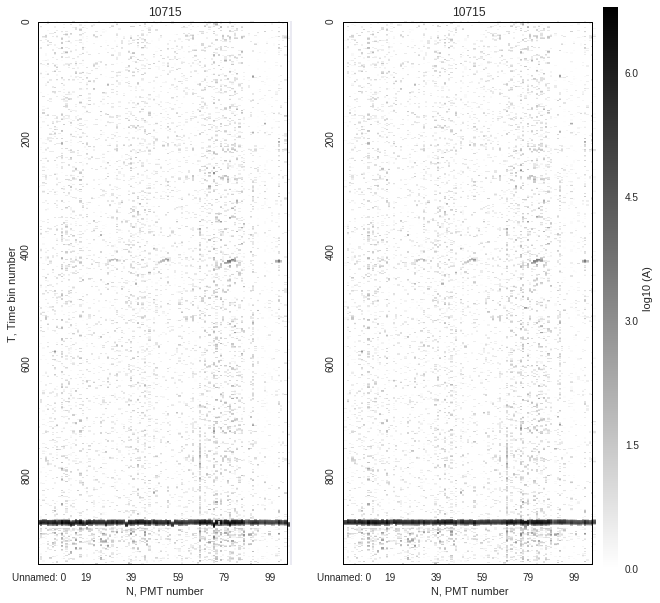

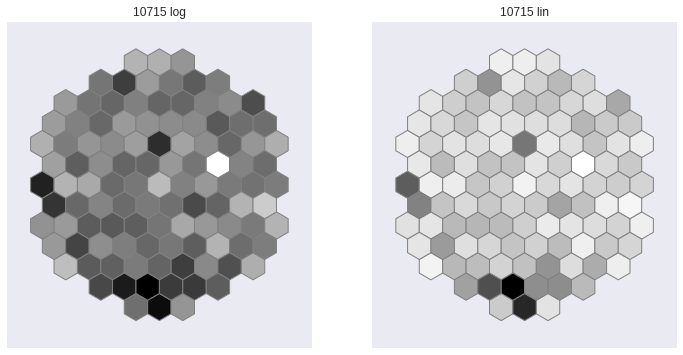

In [72]:
read_and_draw(10715)

# много файлов

In [73]:
num = 10000
filename    = 'data/minus_pied_csv/' + str(num) + '.csv'
try:
    datum = pd.read_csv(filename)
except Exception as e:
    errormsg = e.args[0]
    #errortype = errormsg.split('.')[0].strip()
    print(errormsg)

File b'data/minus_pied_csv/10000.csv' does not exist


In [74]:
for num in range(10685, 11000):
    title = str(num)
    name    = 'data/minus_pied_csv/' + str(num) + '.csv'
    namefig = 'data/shifted_fig/'    + str(num) + '.png'
    nameout = 'data/shifted_csv/shifted' + str(num) + '.csv'
 
    # read
    frame = read_file(name)
    print('file %s read' % name )
    # shift
    shift=shift_calc(frame)
    nframe = shift_make(frame, shift)
    
    # draw
    fig, axn = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(6,12))
    draw_one_frame(nframe,axn,0,title)
    plt.savefig(namefig, bbox_inches='tight')
    
    #save
    nframe.to_csv(nameout)   

file data/minus_pied_csv/10685.csv read


NameError: name 'shift_calc' is not defined